<p align="center">
    <img src="../src/images/Sikit_learn_logo.png" alt="Icon Scikit-Learn" width="50" align="left">
</p>

# Exercise Implementing K-mean algorithm for Dataset Iris with and without using Scikit-learn
---
- Name: Stefanus Bernard Melkisedek
- Bangkit ID: m741d4ky3073
- Email: stefanussipahutar@gmail.com


## Introduction

In this exercise, I will implement the K-mean algorithm for the Iris dataset. **The Iris dataset consists of 150 samples** of iris flowers. Each sample has four features: sepal length, sepal width, petal length, and petal width. 

The samples are labeled with three classes: **setosa**, **versicolor**, and **virginica**. **The goal** of this exercise **is to cluster the samples into three clusters using the K-mean algorithm**. I will implement the K-mean algorithm from scratch and compare the results with the implementation using the Scikit-learn library.

Not only that, I will also visualize the clusters and compare the results of the implementation using the K-mean algorithm from scratch and the implementation using the Scikit-learn library.

The last one, I will evaluate the result by using the **Elbow method, Silhoutte score, ARI(Ajusted Rand Index) Score, and AMI(Ajusted Mutual Information) Score**. 

## Import Libraries


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import necessary modules from sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
)

# Import necessary Python standard library modules
from typing import Tuple, List
from copy import deepcopy
import io

# Import the sys module to modify the Python path
import sys

# Add the "scripts" directory to the Python path
# This is necessary because the utility module is in the "scripts" directory,
# which is not in the Python path by default
sys.path.insert(0, "../scripts/")

# Now that the "scripts" directory is in the Python path, we can import the utility module
import utility

## Prepared dataset

In [2]:
# Load the iris dataset
iris_dataset = datasets.load_iris()

# Extract the features from the dataset
features = iris_dataset.data

# Extract the sepal length and width for all samples
sepal_length = features[:, 0]
sepal_width = features[:, 1]

# Combine sepal length and width into a single array
sepal_dimensions = np.array(list(zip(sepal_length, sepal_width)))

# Define the number of clusters for the k-means algorithm
number_of_clusters = 3

## Implementing K-mean algorithm without using Scikit-learn

### Step 1: Place k random centroids for the initial clusters.

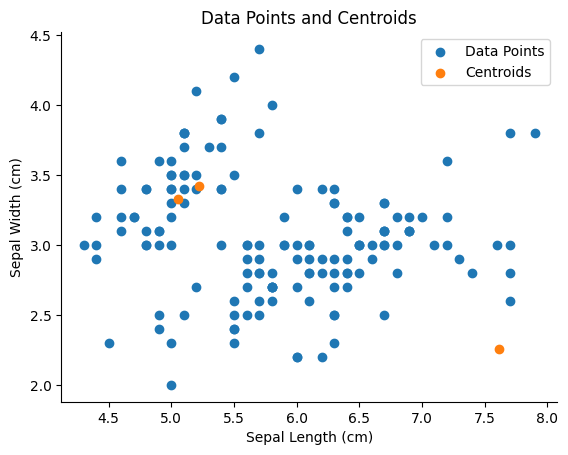

In [3]:
# Initialize number of centroids
k = number_of_clusters

# Create centroids
centroids = utility.create_centroids(sepal_length, sepal_width, k)

# Plot data points and centroids
utility.plot_data_and_centroids(sepal_length, sepal_width, centroids)

### Step 2: Assign data samples to the nearest centroid.

In [4]:
# Initialize cluster labels for each data point
cluster_labels = np.zeros(len(features))

# Assign the nearest centroid to each data point
for i in range(len(features)):
    cluster_labels[i] = utility.assign_to_nearest_centroid(features[i], centroids)

# Print cluster labels
print(cluster_labels)


[0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 2. 0. 2. 1. 2. 0. 0. 1. 2. 1. 1. 0. 0. 0. 0. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 2. 2. 2. 0. 0. 1. 1. 0. 0. 0. 0. 2. 2. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 2. 0. 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 0. 0. 2. 2. 2. 0.
 2. 0. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 0. 0. 2. 0. 0. 0. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


### Step 3: Update centroids based on the above-assigned data samples.

In [5]:
# Create a copy of the old centroids for comparison
previous_centroids = deepcopy(centroids)

# Iterate over each centroid
for centroid_index in range(k):
    # Gather points assigned to the current centroid
    assigned_points = [sepal_dimensions[j] for j in range(len(sepal_dimensions)) if cluster_labels[j] == centroid_index]
    
    # Update the centroid to be the mean of the assigned points
    centroids[centroid_index] = np.mean(assigned_points, axis=0)

# Print the old and new centroids for comparison
for i in range(k):
    print(f"Old centroid {i}: {previous_centroids[i]}, New centroid {i}: {centroids[i]}")

Old centroid 0: [5.21747992 3.42137285], New centroid 0: [5.78955224 3.14925373]
Old centroid 1: [5.05546799 3.32527467], New centroid 1: [4.92380952 2.98809524]
Old centroid 2: [7.61424464 2.25652179], New centroid 2: [6.87317073 2.97804878]


### Step 4: Repeat steps 2 and 3 until the centroids do not change (Convergence).

In [6]:
# Initialize error for each centroid
centroid_errors = np.zeros(k)

# Calculate initial error for each centroid
for centroid_index in range(k):
  centroid_errors[centroid_index] = utility.calculate_euclidean_distance(centroids[centroid_index], previous_centroids[centroid_index])

In [7]:
# Continue updating centroids until error is zero for all centroids
while centroid_errors.all() != 0:

  # Assign each sample to the nearest centroid
  for sample_index in range(len(sepal_dimensions)):
    cluster_labels[sample_index] = utility.assign_to_nearest_centroid(sepal_dimensions[sample_index], centroids)

  # Create a copy of the old centroids for comparison
  previous_centroids = deepcopy(centroids)

  # Update each centroid
  for centroid_index in range(k):
    # Gather points assigned to the current centroid
    assigned_points = [sepal_dimensions[j] for j in range(len(sepal_dimensions)) if cluster_labels[j] == centroid_index]
    
    # Update the centroid to be the mean of the assigned points
    centroids[centroid_index] = np.mean(assigned_points, axis=0)

    # Calculate and print the error for the updated centroid
    centroid_errors[centroid_index] = utility.calculate_euclidean_distance(centroids[centroid_index], previous_centroids[centroid_index])
    print(f"Error for centroid {centroid_index}: {centroid_errors[centroid_index]}")

Error for centroid 0: 0.12196531750082949
Error for centroid 1: 0.1942869790781502
Error for centroid 2: 0.07128355144322428
Error for centroid 0: 0.12479119470974837
Error for centroid 1: 0.10625188379467594
Error for centroid 2: 0.014731391274720222
Error for centroid 0: 0.13948606004452876
Error for centroid 1: 0.06855109337560122
Error for centroid 2: 0.08054274323397594
Error for centroid 0: 0.060297770214248404
Error for centroid 1: 0.06246394474432782
Error for centroid 2: 0.013043412088808918
Error for centroid 0: 0.023031237010818675
Error for centroid 1: 0.013551654597639328
Error for centroid 2: 0.016059176608771326
Error for centroid 0: 0.0180986916755518
Error for centroid 1: 0.01952187034484299
Error for centroid 2: 0.0


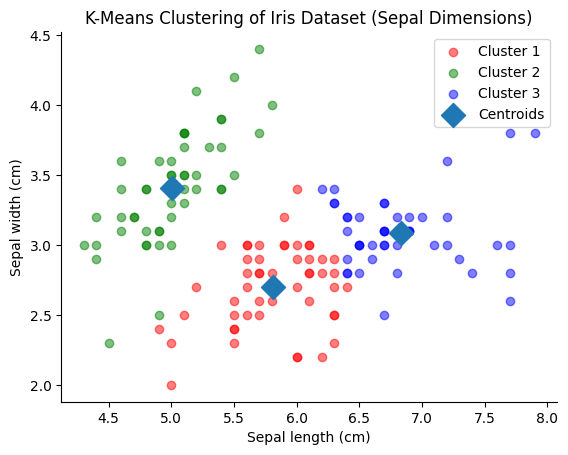

In [8]:
# Plot the final clusters and centroids
utility.plot_clusters(sepal_dimensions, centroids, cluster_labels, k)

## Implementing K-mean algorithm using Scikit-learn

### Step 1 until Step 4: Implementing K-mean algorithm using Scikit-learn

In [9]:
# Load the iris dataset
iris_dataset = datasets.load_iris()

# Extract the features from the dataset
features = iris_dataset.data

# Initialize the KMeans model
kmeans_model = KMeans(n_clusters=3)

# Fit the model to the data
kmeans_model.fit(X=features)

# Predict the cluster labels for the iris dataset
predicted_labels = kmeans_model.predict(features)

# Print the predicted labels
for index, label in enumerate(predicted_labels, start=1):
    print(f"Sample {index} is in Cluster {label}")

Sample 1 is in Cluster 1
Sample 2 is in Cluster 1
Sample 3 is in Cluster 1
Sample 4 is in Cluster 1
Sample 5 is in Cluster 1
Sample 6 is in Cluster 1
Sample 7 is in Cluster 1
Sample 8 is in Cluster 1
Sample 9 is in Cluster 1
Sample 10 is in Cluster 1
Sample 11 is in Cluster 1
Sample 12 is in Cluster 1
Sample 13 is in Cluster 1
Sample 14 is in Cluster 1
Sample 15 is in Cluster 1
Sample 16 is in Cluster 1
Sample 17 is in Cluster 1
Sample 18 is in Cluster 1
Sample 19 is in Cluster 1
Sample 20 is in Cluster 1
Sample 21 is in Cluster 1
Sample 22 is in Cluster 1
Sample 23 is in Cluster 1
Sample 24 is in Cluster 1
Sample 25 is in Cluster 1
Sample 26 is in Cluster 1
Sample 27 is in Cluster 1
Sample 28 is in Cluster 1
Sample 29 is in Cluster 1
Sample 30 is in Cluster 1
Sample 31 is in Cluster 1
Sample 32 is in Cluster 1
Sample 33 is in Cluster 1
Sample 34 is in Cluster 1
Sample 35 is in Cluster 1
Sample 36 is in Cluster 1
Sample 37 is in Cluster 1
Sample 38 is in Cluster 1
Sample 39 is in Clust

### Feed new data to the model

In [10]:
# Define new iris samples for prediction
new_iris_samples = np.array(
    [
        [5.7, 4.4, 1.5, 0.4],  # Sample 1
        [6.5, 3.0, 5.5, 0.4],  # Sample 2
        [5.8, 2.7, 5.1, 1.9]   # Sample 3
    ]
)

# Print each new iris sample
for index, sample in enumerate(new_iris_samples, start=1):
    print(f"Iris Sample {index}: {sample}")

Iris Sample 1: [5.7 4.4 1.5 0.4]
Iris Sample 2: [6.5 3.  5.5 0.4]
Iris Sample 3: [5.8 2.7 5.1 1.9]


In [11]:
# Predict the cluster labels for the new iris samples
new_labels = kmeans_model.predict(X=new_iris_samples)

# Print the predicted labels for each new iris sample
for index, label in enumerate(new_labels, start=1):
    print(f"Predicted Cluster for New Iris Sample {index}: {label+1}")


Predicted Cluster for New Iris Sample 1: 2
Predicted Cluster for New Iris Sample 2: 3
Predicted Cluster for New Iris Sample 3: 3


In [12]:
# Map the predicted labels to their corresponding names
predicted_names = [iris_dataset.target_names[label] for label in new_labels]

# Print the predicted names for each new iris sample
for index, name in enumerate(predicted_names, start=1):
    print(f"Predicted Name for Iris Sample {index}: {name}")

Predicted Name for Iris Sample 1: versicolor
Predicted Name for Iris Sample 2: virginica
Predicted Name for Iris Sample 3: virginica


### Visualize the K-mean clustering results

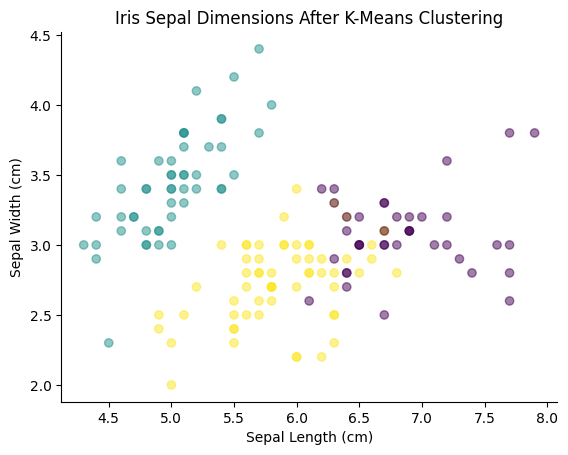

In [13]:
# Extract sepal length and width from the features
sepal_length = np.array(features[:, 0])
sepal_width = np.array(features[:, 1])

# Create a new figure and axes
fig, ax = plt.subplots()

# Create a scatter plot of sepal length vs sepal width, colored by predicted labels
scatter_plot = ax.scatter(sepal_length, sepal_width, c=predicted_labels, alpha=0.5)

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Sepal Width (cm)")

# Set the title of the plot
ax.set_title("Iris Sepal Dimensions After K-Means Clustering")

# Show the plot
plt.show()

## Evaluation

Since the dataset Iris has the ground truth labels, we can evaluate the clustering results using the cross-tabulation relationships, Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI).

Note to remind:

- The cross-tabulation visualizes the count of data points in each cluster and the ground truth label.
- The ARI score has a range of [-1, 1]. The higher the value, the better the clustering result.
- The NMI score has a range of [0, 1]. The higher the value, the better the clustering result.

### Evaluate using cross-tabulation relationship

In [14]:
# Extract the target labels from the iris dataset
target = iris_dataset.target

# Map the target labels to their corresponding names
species = [iris_dataset.target_names[t] for t in target]

# Create a DataFrame from the iris features and species
df = pd.DataFrame(
    {
        'labels' : predicted_labels,
        'species' : species
    }
)
# Print the DataFrame
print(df)

# Create a cross-tabulation of labels and species
ct = pd.crosstab(df['labels'], df['species'])

# Print the cross-tabulation
print(ct)

     labels    species
0         1     setosa
1         1     setosa
2         1     setosa
3         1     setosa
4         1     setosa
..      ...        ...
145       0  virginica
146       2  virginica
147       0  virginica
148       0  virginica
149       2  virginica

[150 rows x 2 columns]
species  setosa  versicolor  virginica
labels                                
0             0           3         36
1            50           0          0
2             0          47         14


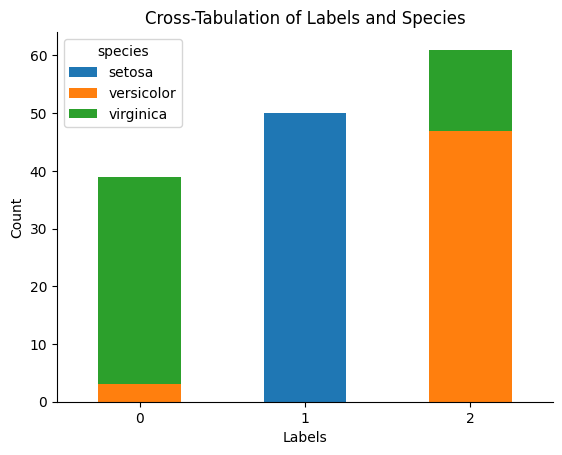

In [15]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Create a bar plot of the cross-tabulation
ct.plot(kind='bar', stacked=True, ax=ax)

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

# Set the title of the plot
ax.set_title("Cross-Tabulation of Labels and Species")

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()

The labels of the dataset Iris are as follows:
- **0**: **Iris-setosa**
- **1**: **Iris-versicolor**
- **2**: **Iris-virginica**

Based on the cross-tabulation relationship, we can conclude that Iris-setosa is clustered perfectly, while Iris-versicolor and Iris-virginica are not clustered perfectly.

### Evaluate using ARI Score

The ARI Score ranges from -1 to 1. A score of 1 means the clusterings are identical, a score of 0 means the clusterings are no better than random, and a score of -1 means the clusterings are completely different.

So, after calculating the ARI Score I would interpret the result as follows:

- If the ARI Score is close to 1, then the model's clustering is very similar to the true clustering.
- If the ARI Score is close to 0, then the model's clustering is no better than random clustering.
- If the ARI Score is close to -1, then the model's clustering is completely different from the true clustering.

In [16]:
# Calculate the ARI score
ari_score = adjusted_rand_score(target, predicted_labels)

# Print the ARI score
print(f'ARI Score: {ari_score:.4f}')

ARI Score: 0.7163


The ARI Score of the K-mean algorithm is 0.7163, this means that the clustering result is having a good performance.

### Evaluate using NMI Score

The NMI Score is a measure of the similarity between two labels of the same data. Values close to zero indicate that the labels are largely independent, while values close to one indicate that the labels are almost identical.

So, after calculating the NMI Score I would interpret the result as follows:

- If the NMI Score is close to 1, then the model's clustering is very similar to the true clustering.
- If the NMI Score is close to 0, then the model's clustering is no better than random clustering.
- If the NMI Score is close to -1, then the model's clustering is completely different from the true clustering.

In [17]:
# Calculate the NMI score
nmi_score = normalized_mutual_info_score(target, predicted_labels)

# Print the NMI score
print(f'NMI Score: {nmi_score:.4f}')

NMI Score: 0.7419


The NMI Score of the K-means Algorithm is 0.7419, this means that the clustering result is similar to the true clustering.

## Method to pick the best K using the Elbow Method

The Elbow method is a technique used in determining the optimal number of clusters (K) in a dataset. It is called 'Elbow' because the visualization of the method looks like an elbow.

Here's What I going to do to pick the best K using the Elbow Method:

1. Run the K-means clustering algorithm for a range of K values (for example, from 1 to 10) and for each value of K, calculate the sum of squared distances from each point to its assigned center (also known as within-cluster sum of squares, or WCSS).

2. Plot the curve of WCSS as a function of the number of clusters K. The plot typically decreases as we increase K; this is because the samples will be closer to the centroids they are assigned to.

3. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. This point is the balance between maximizing the number of clusters (which would reduce WCSS but risk overfitting) and minimizing the complexity of the model (with fewer clusters but potentially higher WCSS).

The 'elbow' is the point of inflection where the rate of decrease sharply shifts. It's the point where adding more clusters doesn't give much better modeling of the data. Hence, it's a good choice for K.

In [18]:
# Define the range of number of clusters to try
num_clusters_range = list(range(1, 11))

# Initialize an empty list to store the inertia values
inertia_values = []

# Loop over each number of clusters
for num_clusters in num_clusters_range:
    # Initialize the KMeans model
    kmeans_model = KMeans(n_clusters=num_clusters)
    
    # Fit the model to the data
    kmeans_model.fit(features)
    
    # Append the model's inertia to the list
    inertia_values.append(kmeans_model.inertia_)

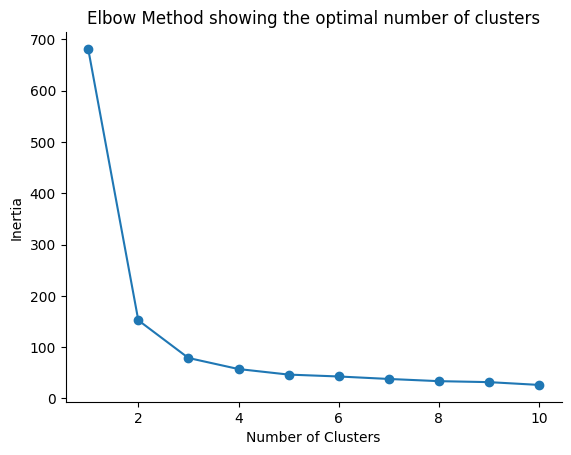

In [19]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the inertia values as a function of the number of clusters
ax.plot(num_clusters_range, inertia_values, '-o')

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

# Set the title of the plot
ax.set_title('Elbow Method showing the optimal number of clusters')

# Show the plot
plt.show()

In [20]:
# Define the range of number of clusters to try
num_clusters_range = [2, 3, 4]

# Initialize an empty list to store the inertia values
inertia_values = []

# Loop over each number of clusters
for num_clusters in num_clusters_range:
    # Initialize the KMeans model
    kmeans_model = KMeans(n_clusters=num_clusters)
    
    # Fit the model to the data
    kmeans_model.fit(features)
    
    # Append the model's inertia to the list
    inertia_values.append(kmeans_model.inertia_)

# Print the inertia values
for i, inertia in zip(num_clusters_range, inertia_values):
    print(f"Inertia for k={i}: {inertia:.2f}")

Inertia for k=2: 152.35
Inertia for k=3: 78.86
Inertia for k=4: 57.28


Well, from the graph elbow method above, It seems the best K is 3 or 4, but I will choose K=3 because the ARI and NMI scores are good enough.

Even though the Elbow Method is a good technique to determine the optimal number of clusters, it is not always easy to find the elbow point. In my case, the elbow point is not very clear, so I will try to use the silhouette score to determine the optimal number of clusters.

## Method to pick the best K using the Silhouette Score

The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Here's how I would use the silhouette score to determine the best number of clusters:

1. For each data point, calculate its average distance to all other points in the same cluster (let's call this a). Then calculate its average distance to all points in the nearest cluster (let's call this b).

2. For each data point, calculate the silhouette score as (b - a) / max(a, b).

3. Calculate the average silhouette score for all data points.

4. Repeat the above steps for different numbers of clusters.

5. The number of clusters with the highest average silhouette score is considered the optimal number.

The silhouette score is a more robust measure than the elbow method because it takes into account both cohesion (how close points in a cluster are) and separation (how distinct clusters are from each other). However, it can be computationally expensive for large datasets.

In [21]:
# Define the range of number of clusters to try
num_clusters_range = list(range(2, 11))  # silhouette_score requires at least 2 clusters

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over each number of clusters
for num_clusters in num_clusters_range:
    # Initialize the KMeans model
    kmeans_model = KMeans(n_clusters=num_clusters)
    
    # Fit the model to the data
    kmeans_model.fit(features)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(features, kmeans_model.labels_)
    silhouette_scores.append(score)

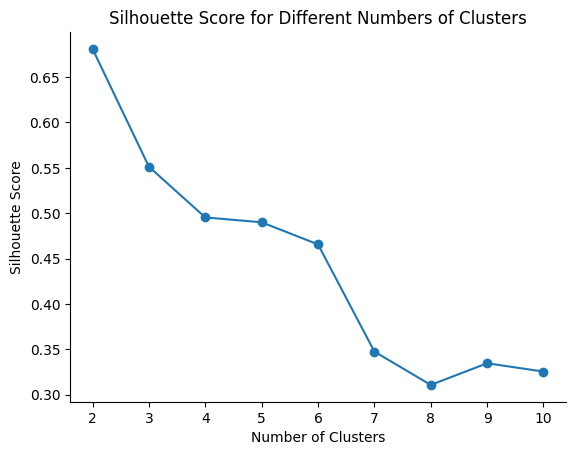

In [22]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the silhouette scores as a function of the number of clusters
ax.plot(num_clusters_range, silhouette_scores, '-o')

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

# Set the title of the plot
ax.set_title('Silhouette Score for Different Numbers of Clusters')

# Show the plot
plt.show()

In [23]:
# Define the range of number of clusters to try
num_clusters_range = [2, 3, 4]

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over each number of clusters
for num_clusters in num_clusters_range:
    # Initialize the KMeans model
    kmeans_model = KMeans(n_clusters=num_clusters)
    
    # Fit the model to the data
    kmeans_model.fit(features)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(features, kmeans_model.labels_)
    silhouette_scores.append(score)

# Print the silhouette scores
for i, score in zip(num_clusters_range, silhouette_scores):
    print(f"Silhouette score for k={i}: {score:.2f}")

Silhouette score for k=2: 0.68
Silhouette score for k=3: 0.55
Silhouette score for k=4: 0.50


Since the silhoutte score is highest for the 2 clusters, but I know there are 3 classes in the Iris dataset, and the elbow method suggests 3 or 4 clusters, I will try to compare the clustering results for K=2, K=3, and K=4 by using the Cross-tabulation relationship, ARI, and NMI scores.

## Compare the clustering results for K=2, K=3, and K=4

### Evaluate for K=2 using cross-tabulation relationship

In [24]:
# Initialize the KMeans model with 2 clusters
kmeans_model = KMeans(n_clusters=2)

# Fit the model to the data and predict the labels
predicted_labels = kmeans_model.fit_predict(features)

# Create a DataFrame with the predicted labels and actual species
df = pd.DataFrame({'labels': predicted_labels, 'species': species})

# Create a cross-tabulation of labels and species
ct = pd.crosstab(df['labels'], df['species'])

# Print the cross-tabulation
print("Cross-tabulation for k=2:")
print(ct)

Cross-tabulation for k=2:
species  setosa  versicolor  virginica
labels                                
0             0          47         50
1            50           3          0


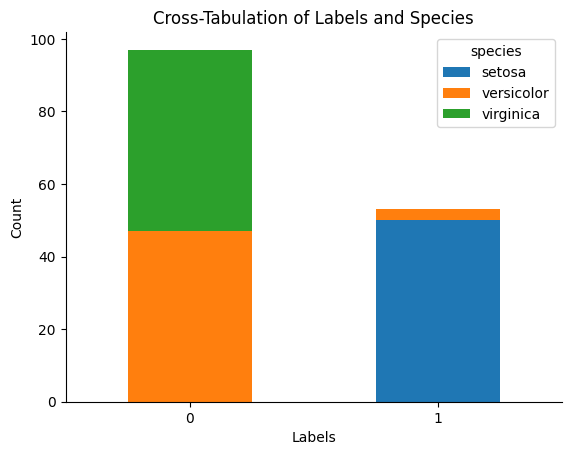

In [25]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Create a bar plot of the cross-tabulation
ct.plot(kind='bar', stacked=True, ax=ax)

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

# Set the title of the plot
ax.set_title("Cross-Tabulation of Labels and Species")

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()

From the stacked bar chart above, I could conclude that when I using the the number of clusters k = 2, the clustering result is not good enough because the Iris-versicolor and Iris-virginica are clustered in label 0 by 50% proportional from Iris-versicolor and 50% proportional from Iris-virginica. It means that the clustering result is not good enough for the number of clusters k = 2.

### Evaluate for K=2 using ARI Score

In [26]:
# Calculate the ARI score
ari_score = adjusted_rand_score(target, predicted_labels)

# Print the ARI score
print(f'ARI Score: {ari_score:.4f}')

ARI Score: 0.5399


The ARI Score of 0.5399 for the number of clusters k = 2, this means that the clustering result is not good enough.

### Evaluate for K=2 using NMI Score

In [28]:
# Calculate the NMI score
nmi_score = normalized_mutual_info_score(target, predicted_labels)

# Print the NMI score
print(f'NMI Score: {nmi_score:.4f}')

NMI Score: 0.6565


The NMI Score of 0.6565 indicates that the model clustering is not good enough compared with the model clustering with number of k = 3 the NMI Score is 0.7419

### Evaluate for K=4 using cross-tabulation relationship

In [29]:
# Initialize the KMeans model with 4 clusters
kmeans_model = KMeans(n_clusters=4)

# Fit the model to the data and predict the labels
predicted_labels = kmeans_model.fit_predict(features)

# Create a DataFrame with the predicted labels and actual species
df = pd.DataFrame({'labels': predicted_labels, 'species': species})

# Create a cross-tabulation of labels and species
ct = pd.crosstab(df['labels'], df['species'])

# Print the cross-tabulation
print("Cross-tabulation for k=4:")
print(ct)

Cross-tabulation for k=4:
species  setosa  versicolor  virginica
labels                                
0             0           0         32
1            50           0          0
2             0          24         17
3             0          26          1


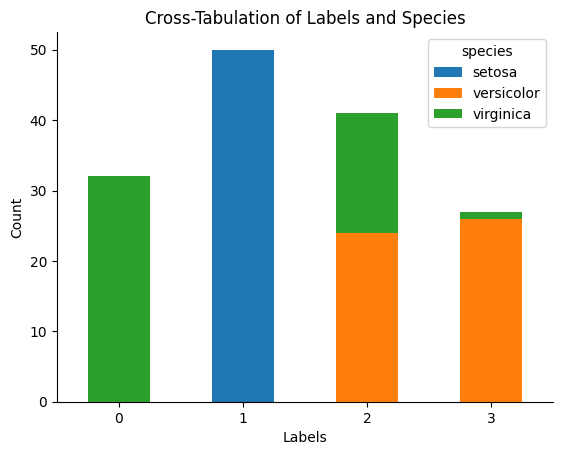

In [30]:
# Create a new figure and axes
fig, ax = plt.subplots()

# Create a bar plot of the cross-tabulation
ct.plot(kind='bar', stacked=True, ax=ax)

# Hide the right and top spines of the plot
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Set the labels of the x and y axes
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

# Set the title of the plot
ax.set_title("Cross-Tabulation of Labels and Species")

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Show the plot
plt.show()

As we can see from the graph above, the clustering result for the number of clusters k = 4 is not good enough because the Iris-versicolor and Iris-virginica are clustered in label 0 by 45% proportional from Iris-versicolor and 55% proportional from Iris-virginica. It means that the clustering result is not good enough for the number of clusters k = 4.

### Evaluate for K=4 using ARI Score

In [31]:
# Calculate the ARI score
ari_score = adjusted_rand_score(target, predicted_labels)

# Print the ARI score
print(f'ARI Score: {ari_score:.4f}')

ARI Score: 0.6461


The ARI Score of 0.6461 for the number of clusters k = 4, this means that the clustering result is not good enough.

##### Evaluate for K=4 using NMI Score

In [32]:
# Calculate the NMI score
nmi_score = normalized_mutual_info_score(target, predicted_labels)

# Print the NMI score
print(f'NMI Score: {nmi_score:.4f}')

NMI Score: 0.7199


The NMI Score of 0.7199 indicates that the model clustering is almost good enough compared with the model clustering with number of k = 3 the NMI Score is 0.7419.